In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
# for dirname, _, filenames in os.walk(playground_series_s5e7_path):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/playground-series-s5e7/sample_submission.csv
/kaggle/input/playground-series-s5e7/train.csv
/kaggle/input/playground-series-s5e7/test.csv


In [2]:
playground_series_s5e7_path = "/kaggle/input/playground-series-s5e7/"

In [3]:
train_file = os.path.join(playground_series_s5e7_path, 'train.csv')
test_file = os.path.join(playground_series_s5e7_path, 'test.csv')

In [4]:
train_data = pd.read_csv(train_file)

In [5]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18524 entries, 0 to 18523
Data columns (total 9 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   id                         18524 non-null  int64  
 1   Time_spent_Alone           17334 non-null  float64
 2   Stage_fear                 16631 non-null  object 
 3   Social_event_attendance    17344 non-null  float64
 4   Going_outside              17058 non-null  float64
 5   Drained_after_socializing  17375 non-null  object 
 6   Friends_circle_size        17470 non-null  float64
 7   Post_frequency             17260 non-null  float64
 8   Personality                18524 non-null  object 
dtypes: float64(5), int64(1), object(3)
memory usage: 1.3+ MB


In [6]:
train_data.head()

/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()


,id,Time_spent_Alone,Stage_fear,Social_event_attendance,Going_outside,Drained_after_socializing,Friends_circle_size,Post_frequency,Personality
0,0,0.0,No,6.0,4.0,No,15.0,5.0,Extrovert
1,1,1.0,No,7.0,3.0,No,10.0,8.0,Extrovert
2,2,6.0,Yes,1.0,0.0,NaN,3.0,0.0,Introvert
3,3,3.0,No,7.0,3.0,No,11.0,5.0,Extrovert
4,4,1.0,No,4.0,4.0,No,13.0,NaN,Extrovert


In [7]:
train_data.isnull().mean()

id                           0.000000
Time_spent_Alone             0.064241
Stage_fear                   0.102192
Social_event_attendance      0.063701
Going_outside                0.079141
Drained_after_socializing    0.062028
Friends_circle_size          0.056899
Post_frequency               0.068236
Personality                  0.000000
dtype: float64

In [8]:
num_cols = train_data.select_dtypes(include=['int64','float64']).columns.to_list()
cat_cols = train_data.select_dtypes(include=['object']).columns.to_list()
num_cols.remove('id')
cat_cols.remove('Personality')


In [9]:
num_cols, cat_cols

(['Time_spent_Alone',
  'Social_event_attendance',
  'Going_outside',
  'Friends_circle_size',
  'Post_frequency'],
 ['Stage_fear', 'Drained_after_socializing'])

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

In [11]:
import warnings

warnings.filterwarnings('ignore')

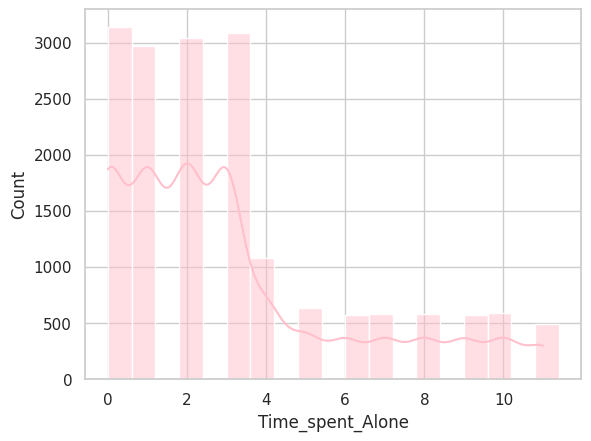

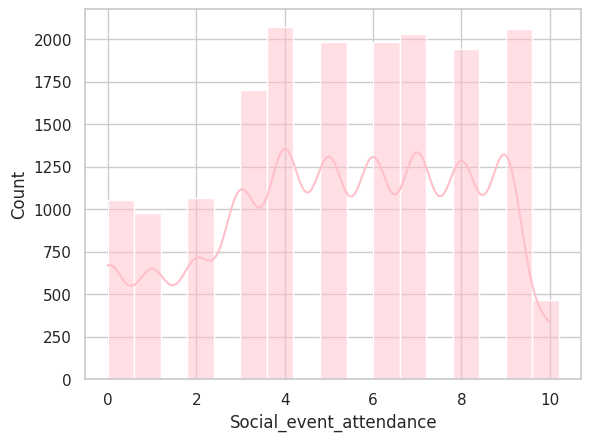

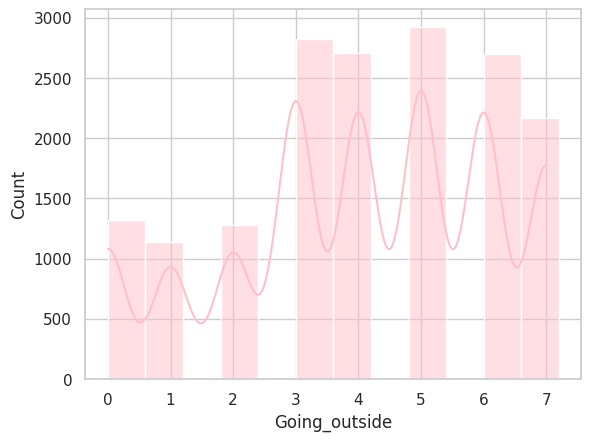

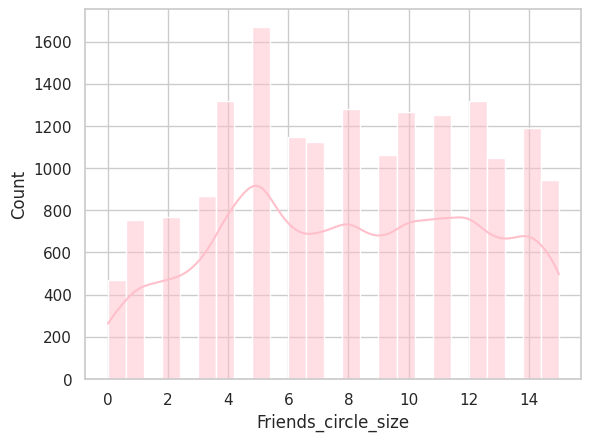

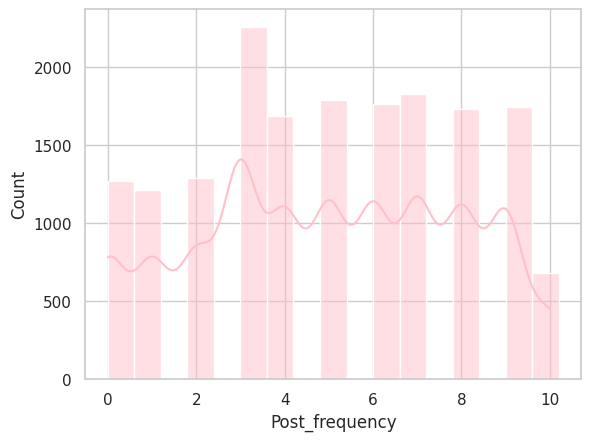

In [12]:
plt.figure()
sns.set_style('whitegrid')
sns.set_context('notebook')
for col in num_cols:
  sns.histplot(train_data[col], kde=True, bins=5, alpha=0.5, binwidth=0.6, color='pink')
  plt.show()

In [13]:
train_data.isnull().sum()

id                              0
Time_spent_Alone             1190
Stage_fear                   1893
Social_event_attendance      1180
Going_outside                1466
Drained_after_socializing    1149
Friends_circle_size          1054
Post_frequency               1264
Personality                     0
dtype: int64

In [14]:
# Impute missing values for numeric columns

from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='mean')
imputer.fit(train_data[num_cols])
train_data[num_cols] = imputer.transform(train_data[num_cols])

In [15]:
# impute missing values for categorical columns

imputer = SimpleImputer(strategy='most_frequent')
imputer.fit(train_data[cat_cols])
train_data[cat_cols] = imputer.transform(train_data[cat_cols])

In [16]:
# Label encoding for categorical columns

from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
for col in cat_cols:
  train_data[col] = label_encoder.fit_transform(train_data[col])

In [17]:
train_data['Personality'] = train_data['Personality'].map({'Extrovert': 0, 'Introvert': 1})

In [18]:
train_data['Personality'].value_counts()

Personality
0    13699
1     4825
Name: count, dtype: int64

In [19]:
# Split the data in train and test sets

from sklearn.model_selection import train_test_split
X = train_data.drop(['id', 'Personality'], axis=1)
y = train_data['Personality']

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=56)

In [21]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

logistic_regression_model = LogisticRegression()
svc_model = SVC()

In [22]:
import xgboost as xgb
xgb_model = xgb.XGBClassifier()

In [23]:
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score

skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

logistic_regression_scores = []
svc_scores = []
xgb_scores = []

for train_index, val_index in skf.split(X_train, y_train):
    X_train_fold, X_val_fold = X_train.iloc[train_index], X_train.iloc[val_index]
    y_train_fold, y_val_fold = y_train.iloc[train_index], y_train.iloc[val_index]

    logistic_regression_model.fit(X_train_fold, y_train_fold)
    lr_pred = logistic_regression_model.predict(X_val_fold)
    logistic_regression_scores.append(accuracy_score(y_val_fold, lr_pred))

    svc_model.fit(X_train_fold, y_train_fold)
    svc_pred = svc_model.predict(X_val_fold)
    svc_scores.append(accuracy_score(y_val_fold, svc_pred))

    xgb_model.fit(X_train_fold, y_train_fold)
    xgb_pred = xgb_model.predict(X_val_fold)
    xgb_scores.append(accuracy_score(y_val_fold, xgb_pred))

In [24]:
avg_logistic_regression_accuracy = np.mean(logistic_regression_scores)
avg_svc_accuracy = np.mean(svc_scores)
avg_xgb_accuracy = np.mean(xgb_scores)

print(f"Average accuracy for Logistic Regression: {avg_logistic_regression_accuracy:.4f}")
print(f"Average accuracy for SVC: {avg_svc_accuracy:.4f}")
print(f"Average accuracy for XGB: {avg_xgb_accuracy: .4f}")

Average accuracy for Logistic Regression: 0.9698
Average accuracy for SVC: 0.9697
Average accuracy for XGB:  0.9680


In [25]:
# Load test data and make predictions

test_data = pd.read_csv(test_file)
test_data.head()


,id,Time_spent_Alone,Stage_fear,Social_event_attendance,Going_outside,Drained_after_socializing,Friends_circle_size,Post_frequency
0,18524,3.0,No,7.0,4.0,No,6.0,NaN
1,18525,NaN,Yes,0.0,0.0,Yes,5.0,1.0
2,18526,3.0,No,5.0,6.0,No,15.0,9.0
3,18527,3.0,No,4.0,4.0,No,5.0,6.0
4,18528,9.0,Yes,1.0,2.0,Yes,1.0,1.0


In [26]:
pp_test_data = test_data.copy()
pp_test_data.drop('id', axis=1, inplace=True)

In [27]:
pp_test_data[cat_cols] = imputer.transform(pp_test_data[cat_cols])

In [28]:
for col in cat_cols:
  pp_test_data[col] = label_encoder.transform(pp_test_data[col])

In [29]:
predictions = xgb_model.predict(pp_test_data)

mapping = {0: 'Extrovert', 1: 'Introvert'}

predictions = np.vectorize(mapping.get)(predictions)

predictions

array(['Extrovert', 'Introvert', 'Extrovert', ..., 'Extrovert',
       'Extrovert', 'Introvert'], dtype='<U9')

In [30]:
results_df = pd.DataFrame({
    'id' : test_data['id'],
    'Personality': predictions
})

In [31]:
results_df.head()

,id,Personality
0,18524,Extrovert
1,18525,Introvert
2,18526,Extrovert
3,18527,Extrovert
4,18528,Introvert


In [32]:
results_df.to_csv('submission.csv', index=False)